In [1]:
import sca as sca
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_lfw_people

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
y = lfw_people.data
n_samples = y.shape[0]
n_features = y.shape[1]
print(n_samples, n_features)

1288 1850


In [4]:
t0 = time.clock()
stab_maps, dwell_time = sca.recursive_cluster(y.transpose(), n_clusters=20, subsample_size=20, 
                                  n_replications=40, n_jobs=-1, n_states=3, contiguous=False)
print(time.clock()-t0, "seconds process time")

1.7919049999999999 seconds process time


In [5]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [6]:
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [7]:
dwell_time

array([[0.025],
       [0.925],
       [0.175],
       [0.95 ],
       [0.7  ],
       [0.075],
       [0.35 ],
       [0.425],
       [0.325],
       [0.125],
       [0.5  ],
       [0.125],
       [0.25 ],
       [0.625],
       [0.175],
       [0.025],
       [0.15 ],
       [0.525],
       [0.25 ],
       [0.55 ],
       [0.3  ],
       [0.875],
       [0.125],
       [0.075],
       [0.5  ],
       [0.65 ],
       [0.3  ],
       [0.5  ],
       [0.175],
       [0.1  ],
       [0.1  ],
       [0.2  ],
       [0.075],
       [0.25 ],
       [0.05 ],
       [0.225],
       [0.075],
       [0.325],
       [0.175],
       [0.125],
       [0.525],
       [0.225],
       [0.3  ],
       [0.35 ],
       [0.475],
       [0.1  ],
       [0.35 ],
       [0.5  ],
       [0.45 ],
       [0.5  ],
       [0.275],
       [0.375],
       [0.05 ],
       [0.   ],
       [0.325],
       [0.3  ],
       [0.35 ],
       [0.35 ],
       [0.1  ],
       [0.5  ]])

In [8]:
stab_maps.shape

(1850, 60)

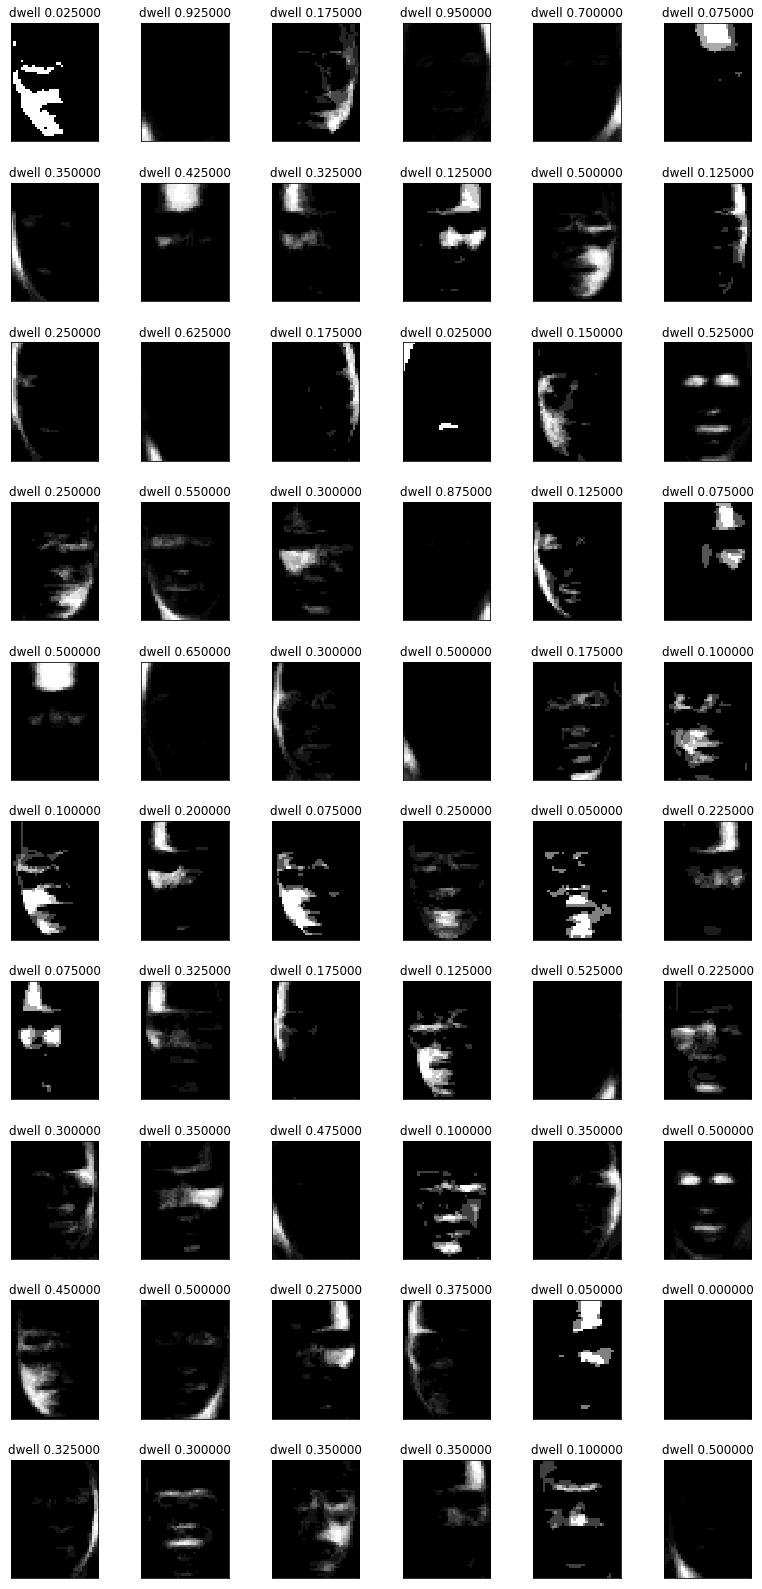

In [9]:
# plot the gallery of the most significative eigenfaces
n_maps = 50
maps_titles = ["dwell %f" % i for i in dwell_time]
plot_gallery(stab_maps.transpose(), maps_titles, h, w, n_row=10, n_col=6)
plt.show()